## 411 Unit3 - Assignment #3

### Wine Sales

Author: Andrew Knight

In [1]:
#imports
import pandas as pd      
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection

import statsmodels.api as sm
import statsmodels.formula.api as smf  # R-like model specification
from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import OLS
from statsmodels.miscmodels.count import PoissonGMLE, PoissonZiGMLE
from statsmodels.genmod.families.family import Poisson, NegativeBinomial

# used for other model tests
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import ensemble #used for two models bewlow
from sklearn import tree

/home/knightandrew/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#Set some display options   
pd.set_option('display.notebook_repr_html', False) 
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 120)

In [3]:
#Read in the auto ins dataset
train = pd.read_csv('wine_train.csv')
test = pd.read_csv('wine_test.csv')
# #A good step to take is to convert all variable names to lower case
train.columns = [s.lower() for s in train.columns]
test.columns = [s.lower() for s in train.columns]
print('Train df dims: ' + str(train.shape))
print('Test df dims: ' + str(test.shape))

Train df dims: (12795, 16)
Test df dims: (3335, 16)


## Section 1 - EDA

In [4]:
# Display the initial variable info for testing
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
index                 12795 non-null int64
target                12795 non-null int64
fixedacidity          12795 non-null float64
volatileacidity       12795 non-null float64
citricacid            12795 non-null float64
residualsugar         12179 non-null float64
chlorides             12157 non-null float64
freesulfurdioxide     12148 non-null float64
totalsulfurdioxide    12113 non-null float64
density               12795 non-null float64
ph                    12400 non-null float64
sulphates             11585 non-null float64
alcohol               12142 non-null float64
labelappeal           12795 non-null int64
acidindex             12795 non-null int64
stars                 9436 non-null float64
dtypes: float64(12), int64(4)
memory usage: 1.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3335 entries, 0 to 3334
Data columns (total 16 columns):
index                 

In [ ]:
# #Some quick plots of the data
# train.hist(figsize=(20,16))
# train.plot(kind= 'box' , subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(10,8))

In [5]:
# So we have some null values throughout, let's find out where and how many of each variable
#print(train.isnull().sum())
print('----------- TRAIN --------------')
for i in train.columns:
    print(str(i) + ' has ' + str(pd.Series(train[i]).isnull().sum()) + ' nulls.')

print('\n----------- TEST  --------------')
for i in test.columns:
    print(str(i) + ' has ' + str(pd.Series(test[i]).isnull().sum()) + ' nulls.')

----------- TRAIN --------------
index has 0 nulls.
target has 0 nulls.
fixedacidity has 0 nulls.
volatileacidity has 0 nulls.
citricacid has 0 nulls.
residualsugar has 616 nulls.
chlorides has 638 nulls.
freesulfurdioxide has 647 nulls.
totalsulfurdioxide has 682 nulls.
density has 0 nulls.
ph has 395 nulls.
sulphates has 1210 nulls.
alcohol has 653 nulls.
labelappeal has 0 nulls.
acidindex has 0 nulls.
stars has 3359 nulls.

----------- TEST  --------------
index has 0 nulls.
target has 3335 nulls.
fixedacidity has 0 nulls.
volatileacidity has 0 nulls.
citricacid has 0 nulls.
residualsugar has 168 nulls.
chlorides has 138 nulls.
freesulfurdioxide has 152 nulls.
totalsulfurdioxide has 157 nulls.
density has 0 nulls.
ph has 104 nulls.
sulphates has 310 nulls.
alcohol has 185 nulls.
labelappeal has 0 nulls.
acidindex has 0 nulls.
stars has 841 nulls.


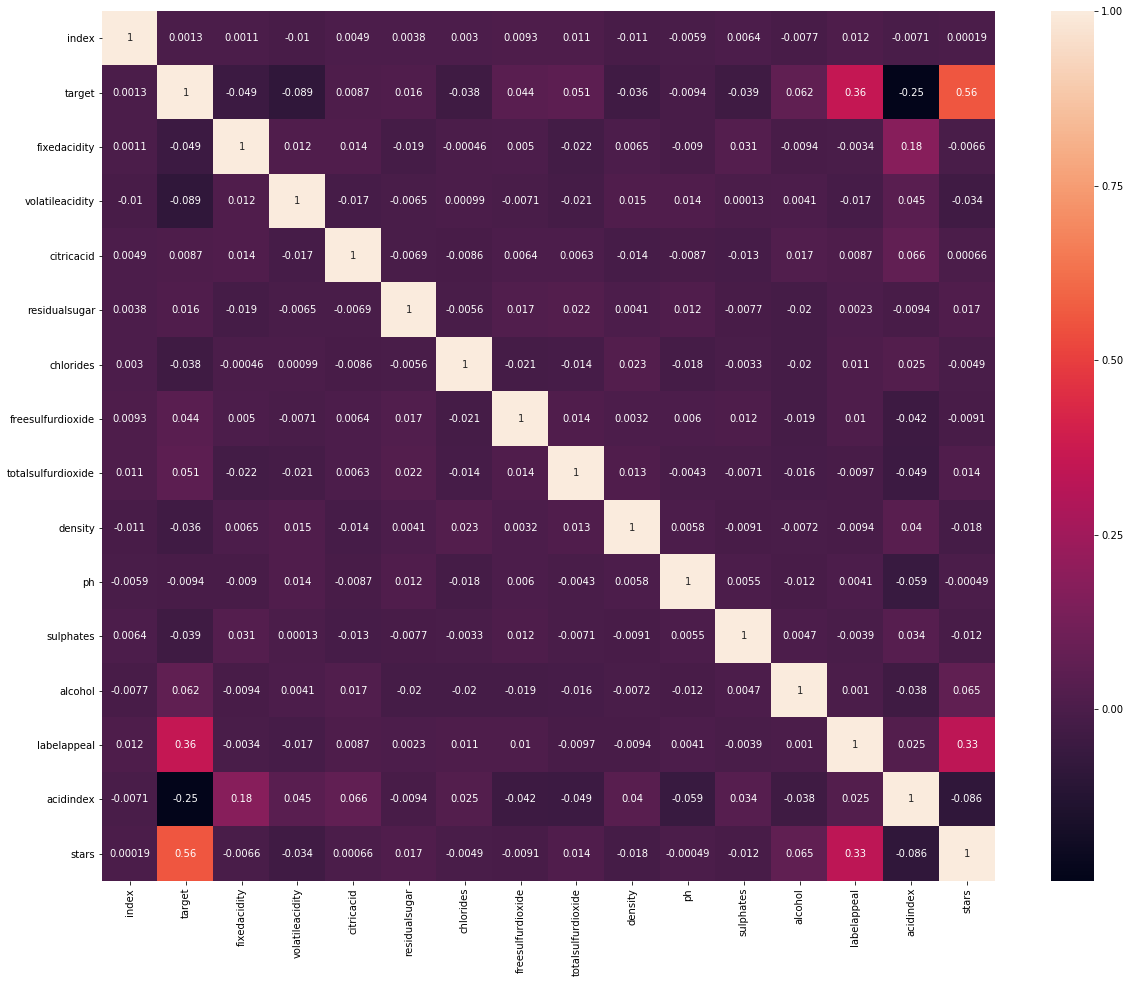

In [6]:
corr = train[train.columns].corr()
plt.figure(figsize = (20, 16))
sns.heatmap(corr, annot = True)

## Section 2 - Data Cleaning

Start with suggested transformations based on shell code provided.

In [8]:
# print(train.describe())
# print(test.describe())

In [9]:
#Replace NaN values with something else - for now we'll start with the calculated means

# ------------------------- TRAIN ---------------------------------------
train=train.replace({'residualsugar': {np.NaN : np.mean(train['residualsugar'])}})
train=train.replace({'chlorides': {np.NaN : np.mean(train['chlorides'])}})
train=train.replace({'freesulfurdioxide': {np.NaN : np.mean(train['freesulfurdioxide'])}})
train=train.replace({'totalsulfurdioxide': {np.NaN : np.mean(train['totalsulfurdioxide'])}})
train=train.replace({'ph': {np.NaN : np.mean(train['ph'])}})
train=train.replace({'sulphates': {np.NaN : np.mean(train['sulphates'])}})
train=train.replace({'alcohol': {np.NaN : np.mean(train['alcohol'])}})
train=train.replace({'stars': {np.NaN : np.mean(train['stars'])}})    #try median here too

# train['residualsugar'] = abs(train.residualsugar) 
# train['chlorides'] = abs(train.chlorides)
# train['freesulfurdioxide'] = abs(train.freesulfurdioxide)
# train['totalsulfurdioxide'] = abs(train.totalsulfurdioxide)
# train['ph'] = abs(train.ph)
# train['sulphates'] = abs(train.sulphates)
# train['fixedacidity'] = abs(train.fixedacidity) 
# train['volatileacidity'] = abs(train.volatileacidity)
# train['citricacid'] = abs(train.citricacid)
# train['alcohol'] = abs(train.alcohol)

# fix the negative values by applying a shift
train['residualsugar'] = train['residualsugar'] + abs(np.min(train['residualsugar'])) +1
train['chlorides'] = train['chlorides'] + abs(np.min(train['chlorides'])) +1
train['freesulfurdioxide'] = train['freesulfurdioxide'] + abs(np.min(train['freesulfurdioxide'])) +1
train['totalsulfurdioxide'] = train['totalsulfurdioxide'] + abs(np.min(train['totalsulfurdioxide']))  +1
train['ph'] = train['ph'] + abs(np.min(train['ph']))  +1
train['sulphates'] = train['sulphates'] + abs(np.min(train['sulphates'])) +1
train['fixedacidity'] = train['fixedacidity'] + abs(np.min(train['fixedacidity'])) +1
train['volatileacidity'] = train['residualsugar'] + abs(np.min(train['residualsugar'])) +1
train['citricacid'] = train['citricacid'] + abs(np.min(train['citricacid'])) +1
train['alcohol'] = train['alcohol'] + abs(np.min(train['alcohol'])) +1
train['labelappeal'] = train['labelappeal'] + abs(np.min(train['labelappeal'])) +1

# # try linear shift scaling ?
# train['residualsugar'] = train['residualsugar'] + np.max(train['residualsugar'])
# train['chlorides'] = train['chlorides'] + np.max(train['chlorides'])
# train['freesulfurdioxide'] = train['freesulfurdioxide'] + np.max(train['freesulfurdioxide'])
# train['totalsulfurdioxide'] = train['totalsulfurdioxide'] + np.max(train['totalsulfurdioxide'])
# train['ph'] = train['ph'] + np.max(train['ph'])
# train['sulphates'] = train['sulphates'] + np.max(train['sulphates'])
# train['fixedacidity'] = train['fixedacidity'] + np.max(train['fixedacidity'])
# train['volatileacidity'] = train['residualsugar'] + np.max(train['residualsugar'])
# train['citricacid'] = train['citricacid'] + np.max(train['citricacid'])
# train['alcohol'] = train['alcohol'] + np.max(train['alcohol'])
# train['labelappeal'] = train['labelappeal'] + np.max(train['labelappeal'])

# ------------------------- TEST  ---------------------------------------
test=test.replace({'residualsugar': {np.NaN : np.mean(test['residualsugar'])}})
test=test.replace({'chlorides': {np.NaN : np.mean(test['chlorides'])}})
test=test.replace({'freesulfurdioxide': {np.NaN : np.mean(test['freesulfurdioxide'])}})
test=test.replace({'totalsulfurdioxide': {np.NaN : np.mean(test['totalsulfurdioxide'])}})
test=test.replace({'ph': {np.NaN : np.mean(test['ph'])}})
test=test.replace({'sulphates': {np.NaN : np.mean(test['sulphates'])}})
test=test.replace({'alcohol': {np.NaN : np.mean(test['alcohol'])}})
test=test.replace({'stars': {np.NaN : np.mean(test['stars'])}})    #try median here too
 
# test['residualsugar'] = abs(test.residualsugar) 
# test['chlorides'] = abs(test.chlorides)
# test['freesulfurdioxide'] = abs(test.freesulfurdioxide)
# test['totalsulfurdioxide'] = abs(test.totalsulfurdioxide)
# test['ph'] = abs(test.ph)
# test['sulphates'] = abs(test.sulphates)
# test['fixedacidity'] = abs(test.fixedacidity) 
# test['volatileacidity'] = abs(test.volatileacidity)
# test['citricacid'] = abs(test.citricacid)
# test['alcohol'] = abs(test.alcohol)

# fix the negative values by applying a shift
test['residualsugar'] = test['residualsugar'] + abs(np.min(test['residualsugar'])) +1
test['chlorides'] = test['chlorides'] + abs(np.min(test['chlorides'])) +1
test['freesulfurdioxide'] = test['freesulfurdioxide'] + abs(np.min(test['freesulfurdioxide'])) +1
test['totalsulfurdioxide'] = test['totalsulfurdioxide'] + abs(np.min(test['totalsulfurdioxide'])) +1
test['ph'] = test['ph'] + abs(np.min(test['ph'])) +1
test['sulphates'] = test['sulphates'] + abs(np.min(test['sulphates'])) +1
test['fixedacidity'] = test['fixedacidity'] + abs(np.min(test['fixedacidity'])) +1
test['volatileacidity'] = test['residualsugar'] + abs(np.min(test['residualsugar'])) +1
test['citricacid'] = test['citricacid'] + abs(np.min(test['citricacid'])) +1
test['alcohol'] = test['alcohol'] + abs(np.min(test['alcohol'])) +1
test['labelappeal'] = test['labelappeal'] + abs(np.min(test['labelappeal'])) +1


# test['residualsugar'] = test['residualsugar'] + np.max(test['residualsugar'])
# test['chlorides'] = test['chlorides'] + np.max(test['chlorides'])
# test['freesulfurdioxide'] = test['freesulfurdioxide'] + np.max(test['freesulfurdioxide'])
# test['totalsulfurdioxide'] = test['totalsulfurdioxide'] + np.max(test['totalsulfurdioxide'])
# test['ph'] = test['ph'] + np.max(test['ph'])
# test['sulphates'] = test['sulphates'] + np.max(test['sulphates'])
# test['fixedacidity'] = test['fixedacidity'] + np.max(test['fixedacidity'])
# test['volatileacidity'] = test['residualsugar'] + np.max(test['residualsugar'])
# test['citricacid'] = test['citricacid'] + np.max(test['citricacid'])
# test['alcohol'] = test['alcohol'] + np.max(test['alcohol'])
# test['labelappeal'] = test['labelappeal'] + np.max(test['labelappeal'])


print(train[train <= 0].count())
print(test[test <= 0].count())

index                 0
target             2734
fixedacidity          0
volatileacidity       0
citricacid            0
                   ... 
sulphates             0
alcohol               0
labelappeal           0
acidindex             0
stars                 0
Length: 16, dtype: int64
index              0
target             0
fixedacidity       0
volatileacidity    0
citricacid         0
                  ..
sulphates          0
alcohol            0
labelappeal        0
acidindex          0
stars              0
Length: 16, dtype: int64


In [10]:
# Let's convert the two ints to floats
train['labelappeal'] = train['labelappeal'].astype(float)
train['acidindex'] = train['acidindex'].astype(float)

test['labelappeal'] = test['labelappeal'].astype(float)
test['acidindex'] = test['acidindex'].astype(float)

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
index                 12795 non-null int64
target                12795 non-null int64
fixedacidity          12795 non-null float64
volatileacidity       12795 non-null float64
citricacid            12795 non-null float64
residualsugar         12795 non-null float64
chlorides             12795 non-null float64
freesulfurdioxide     12795 non-null float64
totalsulfurdioxide    12795 non-null float64
density               12795 non-null float64
ph                    12795 non-null float64
sulphates             12795 non-null float64
alcohol               12795 non-null float64
labelappeal           12795 non-null float64
acidindex             12795 non-null float64
stars                 12795 non-null float64
dtypes: float64(14), int64(2)
memory usage: 1.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3335 entries, 0 to 3334
Data columns (total 16 columns):
index            

In [11]:
# Now perform some feature scaling
# ------------------------- TRAIN  ---------------------------------------
train['volatileacidity'] = train['volatileacidity'] / 100
train['freesulfurdioxide'] = train['freesulfurdioxide'] / 100
train['totalsulfurdioxide'] = train['totalsulfurdioxide'] / 100
train['residualsugar'] = train['residualsugar'] / 100
train['fixedacidity'] = train['fixedacidity'] / 10
train['alcohol'] = train['alcohol'] / 10

# ------------------------- TEST  ---------------------------------------
test['volatileacidity'] = test['volatileacidity'] / 100
test['freesulfurdioxide'] = test['freesulfurdioxide'] / 100
test['totalsulfurdioxide'] = test['totalsulfurdioxide'] / 100
test['residualsugar'] = test['residualsugar'] / 100
test['fixedacidity'] = test['fixedacidity'] / 10
test['alcohol'] = test['alcohol'] / 10


In [12]:
train.describe()

              index        target  fixedacidity  volatileacidity    citricacid  residualsugar     chlorides  \
count  12795.000000  12795.000000  12795.000000     12795.000000  12795.000000   12795.000000  12795.000000   
mean    8069.980305      3.029074      2.617572         1.362187      4.548413       1.342187      2.225822   
std     4656.905107      1.926368      0.631764         0.329269      0.862080       0.329269      0.310425   
min        1.000000      0.000000      0.100000         0.030000      1.000000       0.010000      1.000000   
25%     4037.500000      2.000000      2.430000         1.317000      4.270000       1.297000      2.171000   
50%     8110.000000      3.000000      2.600000         1.357000      4.550000       1.337000      2.219000   
75%    12106.500000      4.000000      2.860000         1.457000      4.820000       1.437000      2.299000   
max    16129.000000      8.000000      5.350000         2.719500      8.100000       2.699500      3.522000   



In [ ]:
# #Some final plots of the cleaned data
# train.hist(figsize=(20,16))
# train.plot(kind= 'box' , subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(10,8))

### Save Cleaned Data

In [13]:
train1 = train.copy()
test1 = test.copy()

index                 AxesSubplot(0.125,0.772143;0.110714x0.107857)
target             AxesSubplot(0.257857,0.772143;0.110714x0.107857)
fixedacidity       AxesSubplot(0.390714,0.772143;0.110714x0.107857)
volatileacidity    AxesSubplot(0.523571,0.772143;0.110714x0.107857)
citricacid         AxesSubplot(0.656429,0.772143;0.110714x0.107857)
                                         ...                       
sulphates          AxesSubplot(0.789286,0.642714;0.110714x0.107857)
alcohol               AxesSubplot(0.125,0.513286;0.110714x0.107857)
labelappeal        AxesSubplot(0.257857,0.513286;0.110714x0.107857)
acidindex          AxesSubplot(0.390714,0.513286;0.110714x0.107857)
stars              AxesSubplot(0.523571,0.513286;0.110714x0.107857)
Length: 16, dtype: object

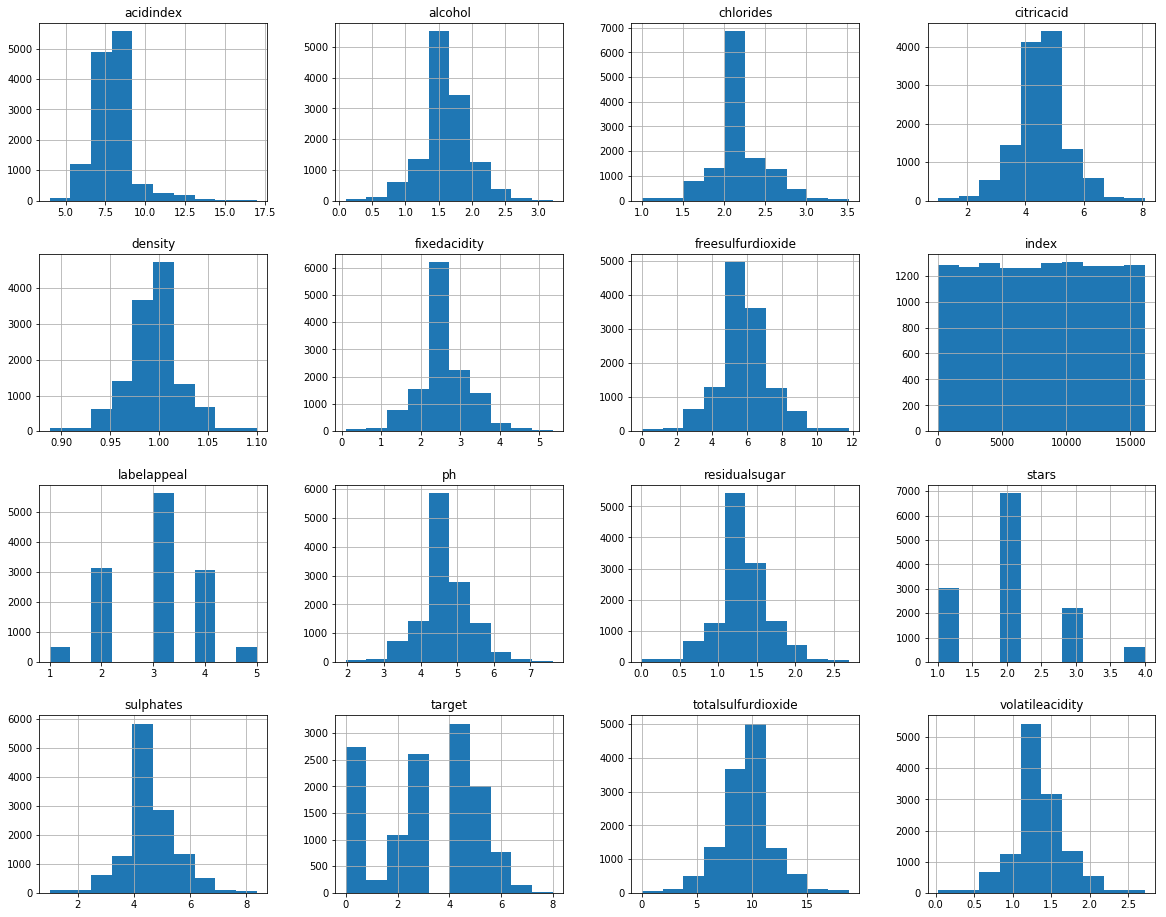

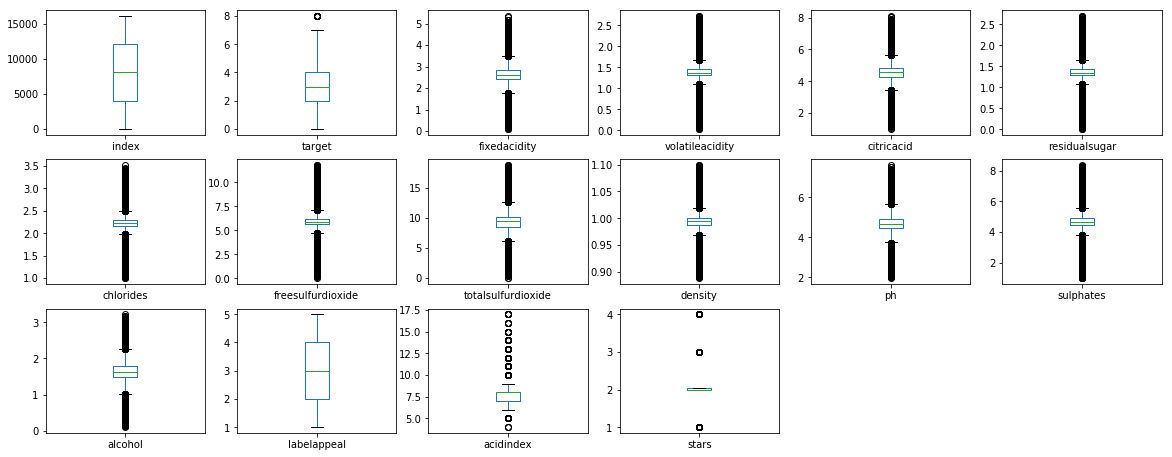

In [14]:
# Show CLEANED training data plots
train1.hist(figsize = (20, 16))
train1.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False, figsize=(20,16))

index                 AxesSubplot(0.125,0.772143;0.110714x0.107857)
target             AxesSubplot(0.257857,0.772143;0.110714x0.107857)
fixedacidity       AxesSubplot(0.390714,0.772143;0.110714x0.107857)
volatileacidity    AxesSubplot(0.523571,0.772143;0.110714x0.107857)
citricacid         AxesSubplot(0.656429,0.772143;0.110714x0.107857)
                                         ...                       
sulphates          AxesSubplot(0.789286,0.642714;0.110714x0.107857)
alcohol               AxesSubplot(0.125,0.513286;0.110714x0.107857)
labelappeal        AxesSubplot(0.257857,0.513286;0.110714x0.107857)
acidindex          AxesSubplot(0.390714,0.513286;0.110714x0.107857)
stars              AxesSubplot(0.523571,0.513286;0.110714x0.107857)
Length: 16, dtype: object

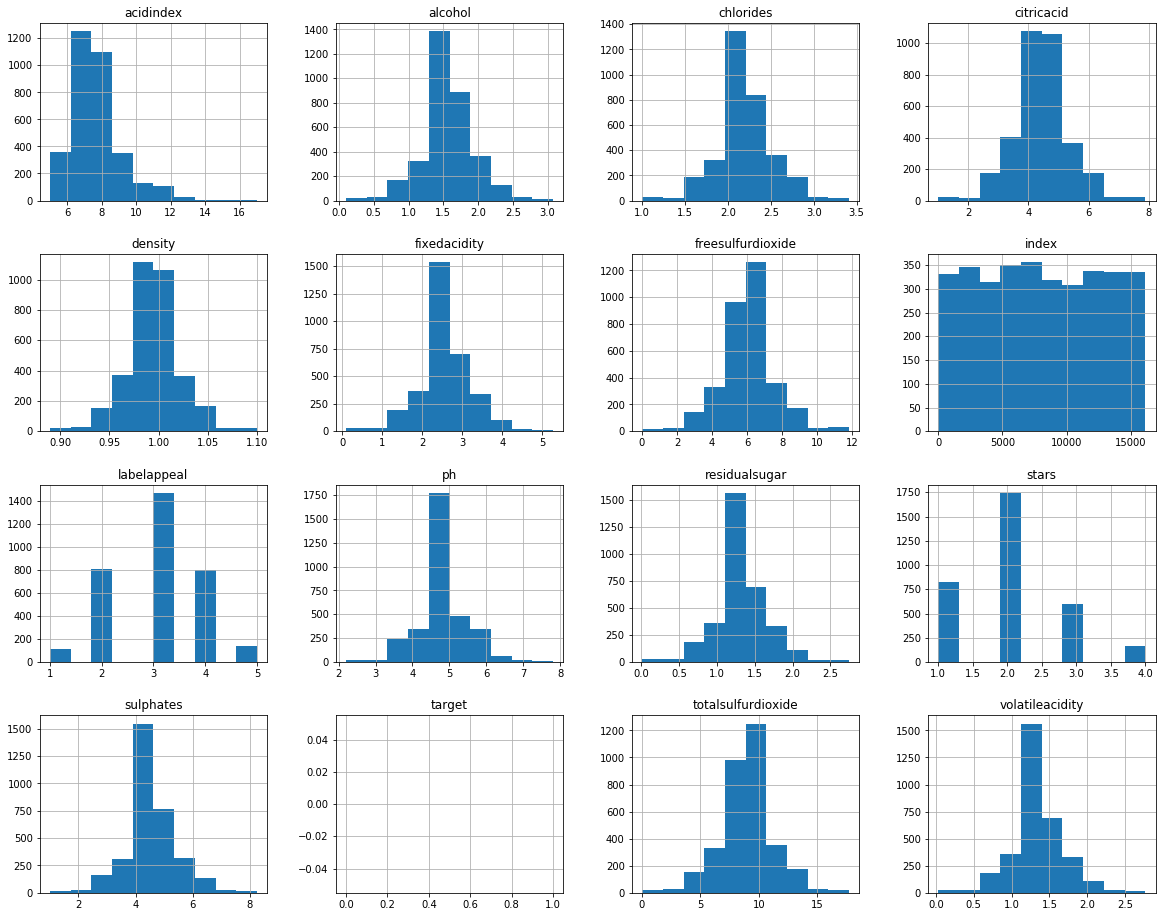

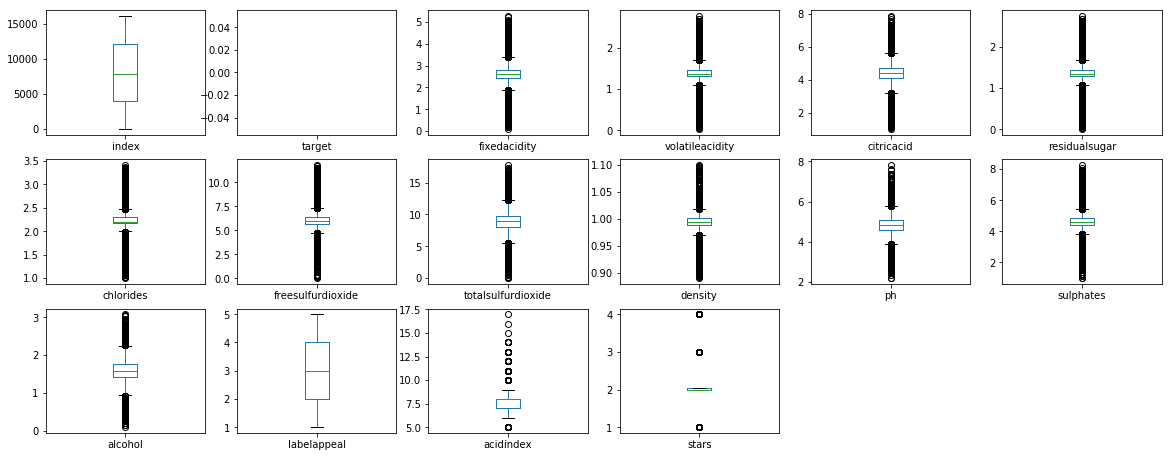

In [15]:
# Show CLEANED testing data plots
test1.hist(figsize = (20, 16))
test1.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False, figsize=(20,16))

In [ ]:
# # Preview New cleaned data frame
# train1.head()

In [ ]:
# # Preview new cleaned data frame for test as well, make sure it looks similar
# test1.head()

### Define the X and Y params for the models

In [16]:
# Model Param trials

# ---------------- CHOOSE VARIABLE SET HERE ---------------------------
SELECTED_VARS = 4

p0 = ["residualsugar", "chlorides", "freesulfurdioxide", "totalsulfurdioxide", "alcohol"] # trial 0 - shell code

p1 = ["labelappeal", "stars"] # trial 1

p2 = ["freesulfurdioxide", "totalsulfurdioxide", "alcohol", "citricacid", "density", 
      "acidindex", "residualsugar"] # trial 2

p3 = ["chlorides", "freesulfurdioxide", "totalsulfurdioxide", "alcohol", "sulphates", "ph", "density", 
      "acidindex", "citricacid", "labelappeal", "volatileacidity", "residualsugar"] # trial 3 - removed fixedacidity (not signif), not incl stars

p4 = ["chlorides", "freesulfurdioxide", "totalsulfurdioxide", "alcohol", "sulphates", "ph", "density", 
      "acidindex", "citricacid", "labelappeal", "volatileacidity", "residualsugar", "stars"] # trial 4 - added stars again

p_options = [p0, p1, p2, p3, p4] # must update if you add more options above!


# ------------------- TRAIN ------------------------
train1 = sm.tools.tools.add_constant(train1)
X = train1[p_options[SELECTED_VARS]].copy()
y = train1['target']
 
# ------------------- TEST  ------------------------
test1 = sm.tools.tools.add_constant(test1)
X_test = test1[p_options[SELECTED_VARS]].copy()

#print(X.head())
# print(X_test.head())

print('\n-----THE MODEL PARAMS-----\nOption ' + str(SELECTED_VARS) + ' selected.\ny: target')
print('X: ' + str(p_options[SELECTED_VARS]))


-----THE MODEL PARAMS-----
Option 4 selected.
y: target
X: ['chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'alcohol', 'sulphates', 'ph', 'density', 'acidindex', 'citricacid', 'labelappeal', 'volatileacidity', 'residualsugar', 'stars']


## Section 3 - Build Models

In [17]:
# Define the model functions

# --------------------- MODEL FIT FUNCTIONS ----------------------------
# Negative Binomial
def runNegBinomial_model(y, X):
    
    return sm.NegativeBinomial(y, X).fit(disp=0)

# Poisson
def runPoisson_model(y, X):
    
    return sm.Poisson(y, X).fit(disp=0)

# Lin Regression
def runLinear_model(y, X):
    
    return sm.OLS(y, X).fit()

# Random Forest
def runRanForest_model(y, X):
    
    RFmodel = ensemble.RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
    # Fit the model to the data.
    return RFmodel.fit(X, y)

# Support Vector Classifier
def runSVC_model(y, X):
    
    SVmodel = SVC()
    return SVmodel.fit(X, y)

# Gradient Boosting
def runGB_model(y, X):
    
    GDmodel = ensemble.GradientBoostingRegressor(n_estimators=500, max_depth=4, min_samples_split=2, learning_rate=0.01, loss='ls')
    return GDmodel.fit(X, y)

# Decision Tree
def runDT_model(y, X):
    
    DTmodel = DecisionTreeClassifier()
    return DTmodel.fit(X, y)

# KNN
def runKN_model(y, X):
    
    KNmodel = KNeighborsClassifier()
    return KNmodel.fit(X, y)

# # Hurdle (optional)
# def runHurdle_model(y, X):
    
#     return None

# --------------------- PREDICT FUNCTIONS ----------------------------
# PREDICT X given model (training)
def predict_model(model, X):
    
    return model.predict(X)

# PREDICT X_test given model (test)
def predict_test_model(model, X_test):
    
    return model.predict(X_test)

Info about the sklearn.ensemble methods can be found herre:
http://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting


### Select and Run the model

In [18]:
# Let's define model options here

SELECTED_MODEL = 5 #this is the index for the model_list options to use
model_list = ['Neg Binomial', 'Poisson', 'Linear OLS', 'Random Forest Regressor', 'Support Vector Classifier', 
             'Gradient Boosting Regressor', 'Decision Tree', 'Nearest Neighbors']

# Now define the model auto_selector based on selection index above
def get_model():
    print(str(model_list[SELECTED_MODEL]) + ' Model Selected')
    if SELECTED_MODEL == 0:
        return runNegBinomial_model(y, X)
    elif SELECTED_MODEL == 1:
        return runPoisson_model(y, X)
    elif SELECTED_MODEL == 2:
        return runLinear_model(y, X)
    elif SELECTED_MODEL == 3:
        return runRanForest_model(y, X)
    elif SELECTED_MODEL == 4:
        return runSVC_model(y, X)
    elif SELECTED_MODEL == 5:
        return runGB_model(y, X)
    elif SELECTED_MODEL == 6:
        return runDT_model(y, X)
    elif SELECTED_MODEL == 7:
        return runKN_model(y, X)
    else:
        print('No model')
        return None
    

In [19]:
# Show the output summary

# these are diff between first three and the rest
model_fit = get_model()
if SELECTED_MODEL <= 2:
    print(model_fit.summary2())
    print(model_fit)
else:
    print(model_fit)
    print('The R^2 score is ' + str(round(model_fit.score(X, y), 4)))

# # for sklearn RF regressor
# print(model_fit.feature_importances_)

# print('Parameters: \n', model_fit.params)
# print('\nStandard errors: \n', model_fit.bse)
# print('\nP-values: \n', model_fit.pvalues)
# print('\nAIC: ', model_fit.aic)

Gradient Boosting Regressor Model Selected
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
The R^2 score is 0.6089


### Evaluate results and score model by sklearn metrics

[3.74598769 3.20151916 3.78490639 ... 4.09459372 3.1385518  3.66883893]

The model MSE is 1.451
The model MAE is 0.92
The accuracy score is 0.365


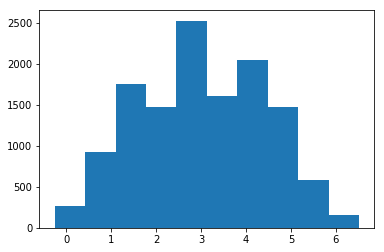

In [20]:
# Show test prediction results

# Run preditions
# if SELECTED_MODEL <= 2:
#     model_testpred = predict_test_model(model_fit, X_test)
#     print(model_testpred)
# else:
#     model_testpred = predict_model(model_fit, X)
#     print(model_testpred)

model_pred = predict_model(model_fit, X)
print(model_pred)

# Show plots
plt.hist(model_pred)
#plt.hist(train['target'])
#tree.export_graphviz(model_fit, out_file = 'tree.dot')

# Evaluate model by metrics
# MSE
model_mse = metrics.mean_squared_error(model_pred, train['target'])
print('\nThe model MSE is ' + str(round(model_mse, 3)))

# MAE
model_mae = metrics.mean_absolute_error(model_pred, train['target'])
print('The model MAE is ' + str(round(model_mae, 3)))

# Accuracy Score
ascore = accuracy_score(y, np.round(model_pred, 0))
print('The accuracy score is ' + str(round(ascore, 3)))

# Classification Report
#print(classification_report(y,model_pred))

# Confusion Matrix
#confusion_matrix(y, model_pred)


In [21]:
# Run test predictions
model_testpred = predict_model(model_fit, X_test)
print(model_testpred)

[1.39471825 3.81237037 2.33989639 ... 3.53666788 3.05385431 4.09206866]


### Write out predictions to scored data file

In [22]:
#Convert the array predictions to a data frame then merge with the index for the test data to create your file
d = {'p_target': model_testpred}
df1 = test[['index']]
df2 = pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
#Submit your file as csv using the following code to save on your computer 
#your_file.to_csv('hw03_andrewknight_p4_gradboost_finalpreds.csv', index = False) # the winning scored file
#your_file.to_csv('hw03_andrewknight_p4_randomforest.csv', index = False)
your_file.head()

   index  p_target
0      3  1.394718
1      9  3.812370
2     10  2.339896
3     18  2.588008
4     21  0.791448

## Section 4 - Selected Model

[4 4 4 ... 4 3 4]

The class model MSE is 1.954
The class model MAE is 0.751
The class accuracy score is 0.584


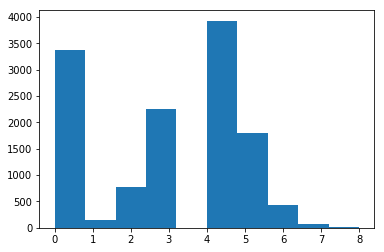

In [23]:
# Perform a quick test of GradBoost Classifier vs Regression

gbclass = ensemble.GradientBoostingClassifier(n_estimators=500, max_depth=4, min_samples_split=2, learning_rate=0.01).fit(X, y) #tested gradient boosting classifier
#rfclass = ensemble.RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1).fit(X, y) #also tested random forest classifier

classmodel_pred = predict_model(gbclass, X) #tested gradient boosting classifier
#classmodel_pred = predict_model(rfclass, X) #also tested random forest classifier
print(classmodel_pred)

# Show plots
plt.hist(classmodel_pred)

# Evaluate model by metrics
# MSE
classmodel_mse = metrics.mean_squared_error(classmodel_pred, train['target'])
print('\nThe class model MSE is ' + str(round(classmodel_mse, 3)))

# MAE
classmodel_mae = metrics.mean_absolute_error(classmodel_pred, train['target'])
print('The class model MAE is ' + str(round(classmodel_mae, 3)))

# Accuracy Score
classascore = accuracy_score(y, np.round(classmodel_pred, 0))
print('The class accuracy score is ' + str(round(classascore, 3)))


In [24]:
print('The R^2 score is ' + str(round(gbclass.score(X, y), 4))) #tested gradient boosting classifier
#print('The R^2 score is ' + str(round(rfclass.score(X, y), 4))) #also tested random forest classifier

The R^2 score is 0.5844


In [25]:
# Run test predictions for the single test
classmodel_testpred = predict_model(gbclass, X_test) #tested gradient boosting classifier
#classmodel_testpred = predict_model(rfclass, X_test) #also tested random forest classifier
print(classmodel_testpred)

#Convert the array predictions to a data frame then merge with the index for the test data to create your file
classd = {'p_target': classmodel_testpred}
classdf1 = test[['index']]
classdf2 = pd.DataFrame(data = classd)
class_file = pd.concat([classdf1, classdf2], axis = 1, join_axes=[classdf1.index])
#Submit your file as csv using the following code to save on your computer
#class_file.to_csv('hw03_andrewknight_p4_gradboostclass.csv', index = False)
#class_file.to_csv('hw03_andrewknight_p4_ranforestclass.csv', index = False) #also tested random forest classifier, scored pred file

[0 4 0 ... 4 4 4]


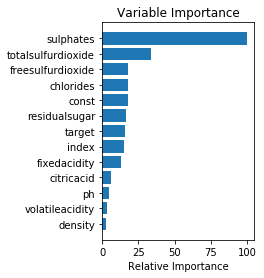

In [26]:
# Plot feature importance - Grad Boosting only!
feature_importance = model_fit.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, test1.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Final model choosen is the Gradient Boosting Regression with p4 params

## Section 5 - Wrap Up

See report - end of notebook